In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import matplotlib.style as style

In [2]:
# load data
data= pd.read_csv('Books_Data_Clean.csv')
data
df= data.copy()
df.head()

index  Publishing Year                        Book Name  \
0      0           1975.0                          Beowulf   
1      1           1987.0                 Batman: Year One   
2      2           2015.0                Go Set a Watchman   
3      3           2008.0  When You Are Engulfed in Flames   
4      4           2011.0         Daughter of Smoke & Bone   

                                              Author language_code  \
0                             Unknown, Seamus Heaney         en-US   
1  Frank Miller, David Mazzucchelli, Richmond Lew...           eng   
2                                         Harper Lee           eng   
3                                      David Sedaris         en-US   
4                                       Laini Taylor           eng   

  Author_Rating  Book_average_rating  Book_ratings_count          genre  \
0        Novice                 3.42              155903  genre fiction   
1  Intermediate                 4.23              145267  genre fiction   
2        Novice                 3.31              138669  genre fiction   
3  Intermediate                 4.04              150898        fiction   
4  Intermediate                 4.04              198283  genre fiction   

   gross sales  publisher revenue  sale price  sales rank  \
0      34160.0            20496.0        4.88           1   
1      12437.5             7462.5        1.99           2   
2      47795.0            28677.0        8.69           3   
3      41250.0            24750.0        7.50           3   
4      37952.5            22771.5        7.99           4   

                       Publisher   units sold  
0        HarperCollins Publishers        7000  
1        HarperCollins Publishers        6250  
2  Amazon Digital Services,  Inc.        5500  
3             Hachette Book Group        5500  
4         Penguin Group (USA) LLC        4750

In [3]:
#Check for the shape of the dataset (number of rows and columns)
df.shape

(1070, 15)

In [4]:
# checking for null values
df.isna().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [5]:
#Checking for the data type of each column
df.dtypes

index                    int64
Publishing Year        float64
Book Name               object
Author                  object
language_code           object
Author_Rating           object
Book_average_rating    float64
Book_ratings_count       int64
genre                   object
gross sales            float64
publisher revenue      float64
sale price             float64
sales rank               int64
Publisher               object
units sold               int64
dtype: object

In [6]:
# Checking the column names
df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [7]:
# Checvking for duplicated records
duplicates_count = df.duplicated().sum()
print (f' There are {duplicates_count} duplicates')

 There are 0 duplicates


In [8]:
# Data cleaning
# dropping the missing value row n the year column since its a single row

df = df.dropna(subset =['Publishing Year'] )

# filling the missing language code with the most occuring language code

mod_language =df['language_code'].mode()[0]
df['language_code'].fillna(mod_language, inplace = True)

# filling the missing book names with untitled

df['Book Name'].fillna("Untitled Book", inplace=True)

# coverting the publishing year datatype from float to int

df['Publishing Year']=df['Publishing Year'].astype(int) 

# the publishing year column contains negatives values that needs to be filtered out

filter = df['Publishing Year'] > 0
df = df.loc[filter, : ]

# in the genre column there are some rows with the values (genre fiction) which needs to be changed because there is no genre known as 'genre fiction'  

df['genre'] = df['genre'].replace('genre fiction', 'fiction')

In [9]:
df.isna().sum()

index                  0
Publishing Year        0
Book Name              0
Author                 0
language_code          0
Author_Rating          0
Book_average_rating    0
Book_ratings_count     0
genre                  0
gross sales            0
publisher revenue      0
sale price             0
sales rank             0
Publisher              0
units sold             0
dtype: int64

# factors that contribute to the success and popularity of a book

### the Genre of the book

In [10]:
# Genere with the highest book count
genre_count=df['genre'].value_counts()    
genre_count.reset_index()

genre  count
0     fiction    878
1  nonfiction    170
2    children     15

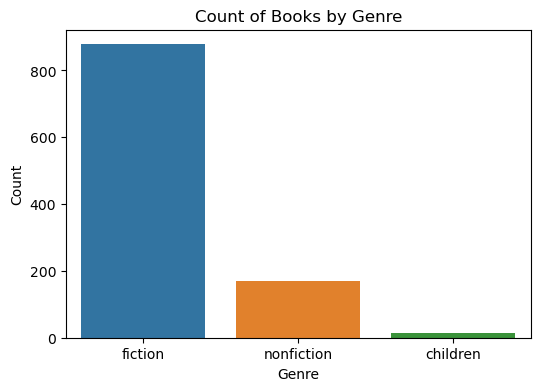

In [11]:
#Fiction as the highest number of books produced (878).
#The children genre has the lowest number of books published.

# Bar chart showing the books count against Genre
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='genre', data=df, order=df['genre'].value_counts().index)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Books by Genre')

plt.show()

In [12]:
# finding the most popular Genre
genre_unit = df[['genre', 'units sold']]
genre_unit = genre_unit.groupby('genre')['units sold'].sum().reset_index()
genre_units= genre_unit.sort_values(by='units sold', ascending = False).reset_index(drop = True)
genre_units

genre  units sold
0     fiction     8331234
1  nonfiction     1629953
2    children      298118

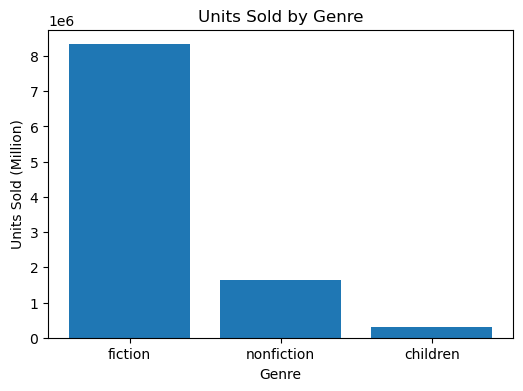

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(genre_units['genre'], genre_units['units sold'])

plt.title('Units Sold by Genre')
plt.xlabel('Genre')
plt.ylabel('Units Sold (Million)')

plt.show()

#There was high demand for fiction literature. Fiction dominated the genre, selling the most units.

### The Publisher

In [14]:
publisher_counts =df['Publisher '].value_counts()
publisher_counts.reset_index()

Publisher   count
0        Amazon Digital Services,  Inc.    596
1                      Random House LLC    120
2               Penguin Group (USA) LLC    107
3              HarperCollins Publishers     71
4                   Hachette Book Group     64
5  Simon and Schuster Digital Sales Inc     56
6                             Macmillan     41
7              HarperCollins Publishing      4
8    HarperCollins Christian Publishing      4

Text(0.5, 1.0, 'Count of Books by Publisher')

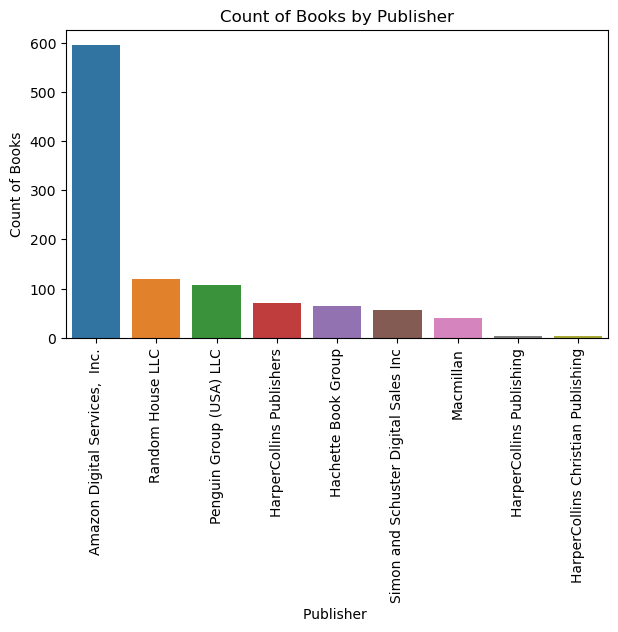

In [15]:
fig, ax= plt.subplots(figsize =(7,4))
ax = sns.countplot(x='Publisher ', data=df, order=df['Publisher '].value_counts().index)

plt.xticks(rotation=90)
plt.ylabel('Count of Books')
plt.title('Count of Books by Publisher')

In [16]:
Publisher = df[['Publisher ', 'gross sales', 'publisher revenue']]
publisher_revenue = Publisher.groupby(['Publisher '])[['gross sales', 'publisher revenue']].sum().reset_index()
publisher_revenue= publisher_revenue.sort_values(by='publisher revenue', ascending = False).reset_index(drop = True).head(10)
publisher_revenue

Publisher   gross sales  publisher revenue
0               Penguin Group (USA) LLC    355696.92         213418.152
1                      Random House LLC    315975.37         189585.222
2        Amazon Digital Services,  Inc.    728506.55         147947.772
3                   Hachette Book Group    226797.69         136078.614
4              HarperCollins Publishers    214130.43         128478.258
5  Simon and Schuster Digital Sales Inc     78313.92          46988.352
6                             Macmillan     53927.06          32356.236
7              HarperCollins Publishing      4718.01           2830.806
8    HarperCollins Christian Publishing      3559.45           2135.670

<Axes: title={'center': "Publisher's Revenue Chart"}, xlabel='gross sales', ylabel='publisher revenue'>

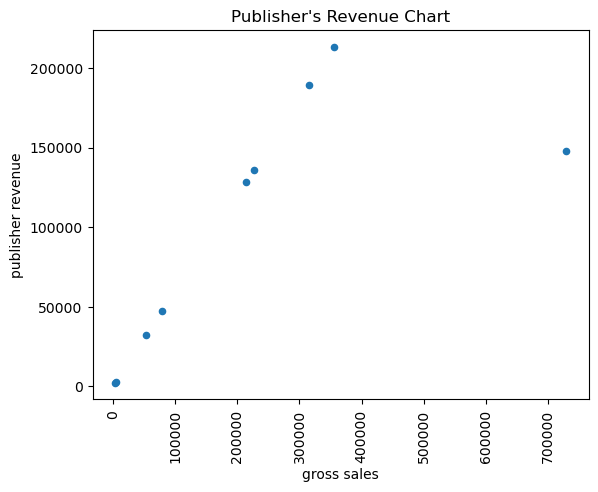

In [17]:
publisher_revenue.plot(kind='scatter', x='gross sales', rot=90, y='publisher revenue',\
                    title="Publisher's Revenue Chart")

<Axes: title={'center': "Publisher's Revenue Chart"}, xlabel='Publisher ', ylabel='gross sales'>

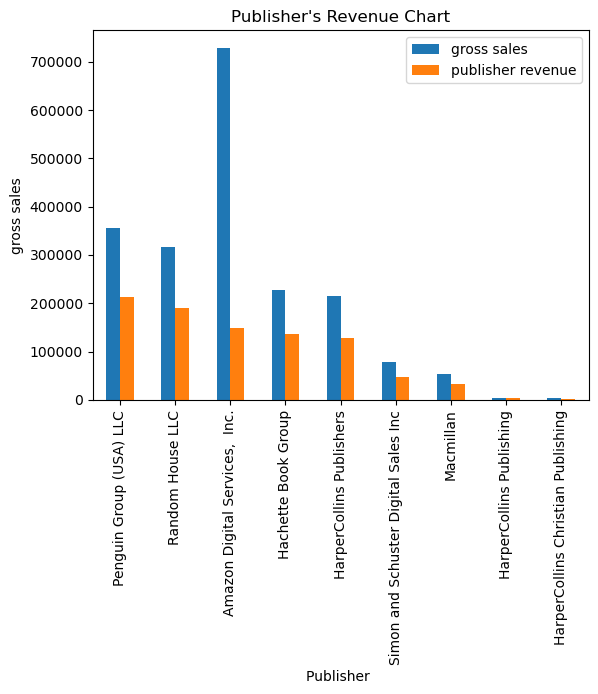

In [18]:
publisher_revenue.plot(kind='bar', y=['gross sales', 'publisher revenue'], x='Publisher ',
                                  title="Publisher's Revenue Chart", xlabel='Publisher ', ylabel='gross sales', rot=90)

In [19]:
### Does the ratings count affect the ratings

In [20]:
book = df[['Book Name', 'Book_average_rating', 'Book_ratings_count']]
book_rating = book.groupby(['Book Name'])[['Book_average_rating', 'Book_ratings_count']].mean().reset_index()
book_rating= book_rating.sort_values(by='Book_average_rating', ascending = False).reset_index(drop = True).head(10)
book_rating.round(2)

Book Name  Book_average_rating  \
0                                  Words of Radiance                 4.77   
1                           A Court of Mist and Fury                 4.72   
2  The Essential Calvin and Hobbes: A Calvin and ...                 4.65   
3                                   The Way of Kings                 4.64   
4                                  Calvin and Hobbes                 4.61   
5                                   Queen of Shadows                 4.60   
6               The Hobbit and The Lord of the Rings                 4.59   
7           A Storm of Swords: Part 2 Blood and Gold                 4.56   
8                                 The House of Hades                 4.54   
9                                       Heir of Fire                 4.53   

   Book_ratings_count  
0             73572.0  
1            108384.0  
2             93001.0  
3            144822.0  
4            117788.0  
5             99067.0  
6             90907.0  
7             54977.0  
8            159774.0  
9            123843.0

<Axes: title={'center': 'Scatter Plot of average ratings and ratings count'}, xlabel='Book_average_rating', ylabel='Book_ratings_count'>

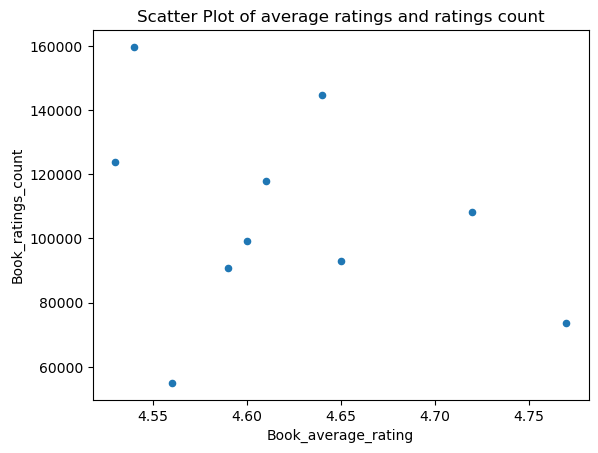

In [21]:
book_rating.plot(kind='scatter', x='Book_average_rating', y='Book_ratings_count',\
                    title='Scatter Plot of average ratings and ratings count')

In [22]:
#this shows that the less the number of review counts the higher the ratings

In [23]:
#book ratings correlation with gross sales
book = df[['Book Name', 'Book_average_rating', 'gross sales']]
book_rating = book.groupby(['Book Name'])[['Book_average_rating', 'gross sales']].mean().reset_index()
book_rating= book_rating.sort_values(by='gross sales', ascending = False).reset_index(drop = True).head(10)
book_rating.round(2)

Book Name  Book_average_rating  gross sales
0                        Go Set a Watchman                 3.31     47795.00
1          When You Are Engulfed in Flames                 4.04     41250.00
2                 Daughter of Smoke & Bone                 4.04     37952.50
3                                  Beowulf                 3.42     34160.00
4                       The Power of Habit                 4.03     27491.67
5                      The Virgin Suicides                 3.83     26904.06
6  Midnight in the Garden of Good and Evil                 3.90     26182.00
7                                 Hopeless                 4.34     26093.67
8                        A Little Princess                 4.20     23792.34
9                     The Velveteen Rabbit                 4.29     21797.82

In [33]:
#book ratings correlation with gross sales
book = df[['Publisher ', 'Book_average_rating', 'gross sales']]
book_rating = book.groupby(['Publisher '])[['Book_average_rating', 'gross sales']].mean().reset_index()
book_rating= book_rating.sort_values(by='gross sales', ascending = False).reset_index(drop = True).head(10)
book_rating.round(2)

Publisher   Book_average_rating  gross sales
0                   Hachette Book Group                 3.96      3543.71
1               Penguin Group (USA) LLC                 4.04      3324.27
2              HarperCollins Publishers                 4.02      3015.92
3                      Random House LLC                 3.99      2633.13
4  Simon and Schuster Digital Sales Inc                 4.04      1398.46
5                             Macmillan                 4.00      1315.29
6        Amazon Digital Services,  Inc.                 4.00      1222.33
7              HarperCollins Publishing                 4.13      1179.50
8    HarperCollins Christian Publishing                 4.17       889.86

Text(0, 0.5, 'Frequency')

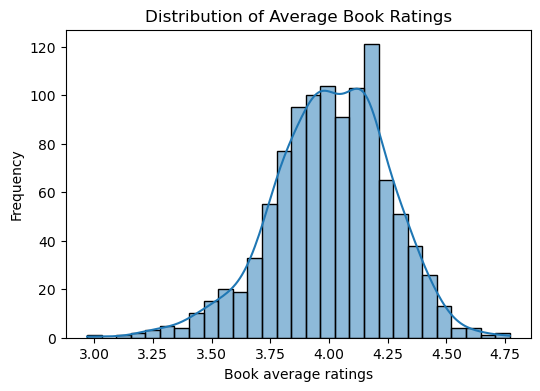

In [29]:
#What is the distribution of Books Average Ratings?
fig, ax = plt.subplots(figsize = (6,4))
sns.histplot(data = df, x= 'Book_average_rating', kde= True)

plt.title('Distribution of Average Book Ratings')
plt.xlabel('Book average ratings')
plt.ylabel('Frequency')

##### Books with Rating around 4.0 are sold more.

In [24]:
#which publishers tend to produce books with higher ratings count and gross sales
publishers=df.groupby('Publisher ',).agg({'Book_ratings_count':'mean', 'gross sales':'mean', })\
.reset_index().round(2).sort_values(by='gross sales', ascending = False)
publishers

Publisher   Book_ratings_count  gross sales
1                   Hachette Book Group            97634.92      3543.71
6               Penguin Group (USA) LLC            96993.24      3324.27
3              HarperCollins Publishers            94149.01      3015.92
7                      Random House LLC            94759.79      2633.13
8  Simon and Schuster Digital Sales Inc            92055.54      1398.46
5                             Macmillan            93126.63      1315.29
0        Amazon Digital Services,  Inc.            94977.71      1222.33
4              HarperCollins Publishing            90237.75      1179.50
2    HarperCollins Christian Publishing            84649.25       889.86

<Axes: title={'center': 'book ratings with gross sales'}, xlabel='Publishers', ylabel='gross sales'>

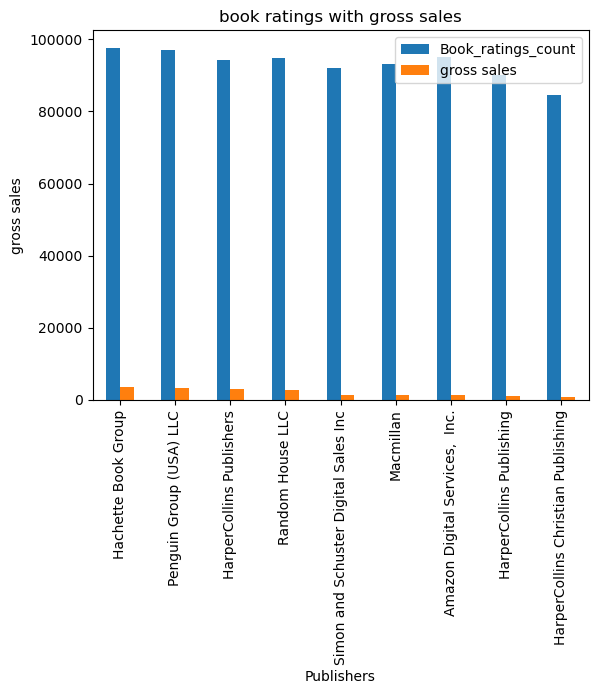

In [25]:
publishers.plot(kind='bar', y=['Book_ratings_count', 'gross sales'], x='Publisher ',
                                  title='book ratings with gross sales', xlabel='Publishers', ylabel='gross sales', rot=90)

 ### Correlation Between (Book_average_rating, Book_ratings_count, gross_sales, sale price, units sold, publisher revenue)?

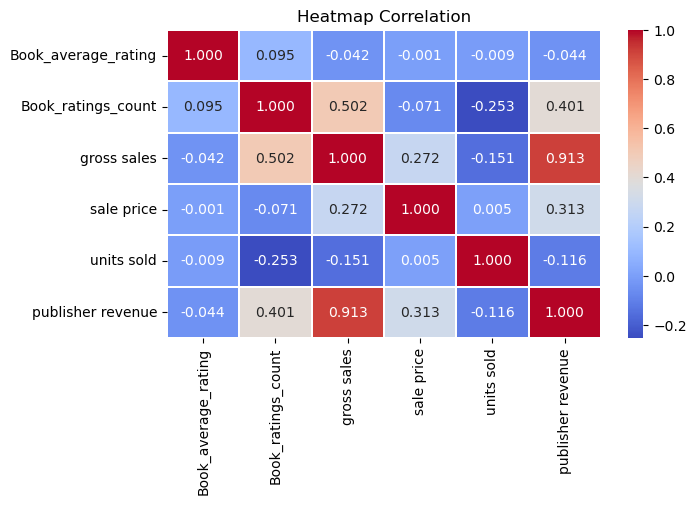

In [26]:
df_corr = df[['Book_average_rating', 'Book_ratings_count','gross sales', 'sale price', 'units sold', 'publisher revenue' ]]
correlation_matrix = df_corr.corr()


plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.2)
plt.title('Heatmap Correlation')
plt.show()